In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3

In [2]:
# Định nghĩa thư mục dữ liệu
train_dir = './Train'
val_dir = './Test'

# Tạo ImageDataGenerator cho tập huấn luyện và tập kiểm tra
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Tạo generator cho dữ liệu
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # InceptionV3 yêu cầu kích thước đầu vào 299x299
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Tải mô hình InceptionV3 với trọng số được huấn luyện trước
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Đóng băng các lớp của mô hình cơ sở để không huấn luyện lại
base_model.trainable = False

# Thêm các lớp tùy chỉnh lên trên mô hình InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Thay vì Flatten, dùng GlobalAveragePooling2D
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

# Tạo mô hình hoàn chỉnh
model = Model(inputs=base_model.input, outputs=outputs)

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Lưu mô hình
model.save('tool_recognition_inception_model.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7306 - loss: 0.7551

D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7318 - loss: 0.7518 - val_accuracy: 0.9056 - val_loss: 0.2832
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9117 - loss: 0.2551 - val_accuracy: 0.9278 - val_loss: 0.2153
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9221 - loss: 0.2190 - val_accuracy: 0.9139 - val_loss: 0.2646
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9369 - loss: 0.1966 - val_accuracy: 0.9333 - val_loss: 0.2152
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9304 - loss: 0.1782 - val_accuracy: 0.9435 - val_loss: 0.1912
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9451 - loss: 0.1470 - val_accuracy: 0.9481 - val_loss: 0.1548
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9452 - loss: 0.1611 - val_accuracy: 0.9407 - val_loss: 0.1803
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9405 - loss: 0.1636 - val_accuracy: 0.9398 - val_loss: 0.

Độ chính xác trên tập kiểm tra: 96.20%


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 22,591,924 (86.18 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 526,094 (2.01 MB)

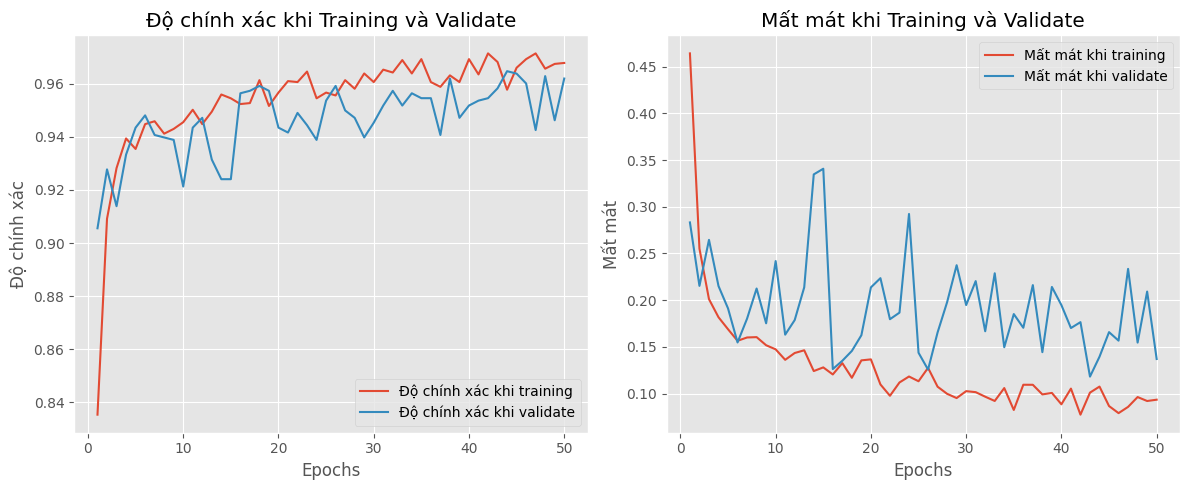

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# In tóm tắt kiến trúc mô hình
print("Model Summary:")
model.summary()

# Trích xuất thông tin từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = len(history.history["loss"])
epochs_range = range(1, num_epochs + 1)

# Thiết lập phong cách ggplot
plt.style.use("ggplot")

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Độ chính xác khi training')
plt.plot(epochs_range, val_acc, label='Độ chính xác khi validate')
plt.title('Độ chính xác khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Độ chính xác')
plt.legend()

# Biểu đồ hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Mất mát khi training')
plt.plot(epochs_range, val_loss, label='Mất mát khi validate')
plt.title('Mất mát khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Mất mát')
plt.legend()

# Đảm bảo bố cục gọn gàng và hiển thị biểu đồ
plt.tight_layout()
plt.show()